<a href="https://colab.research.google.com/github/VindhyaHV/IEEE-CSI-Fraud-Data-detection/blob/main/FD_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###  Definition




1.   This case study is a small step towards helping millions of 
customers and saving them from fraudulent transactions. IEEE-CIS is partnering with world’s leading payment service company, Vesta Corporation in providing the best solution for fraud prevention industry.
2.   Here we will benchmark machine learning models on a challenging large-scale dataset provided by Vesta's real-world e-commerce transactions and contains a wide range of features from device type to product features.


In [ ]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.54 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14242/568274/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1652506314&Signature=K951t0NtPMIKfi%2BnR3%2BlnKtZAq5B9HjjNPYUyg7UAPqUAaqSWaT5tefKVPBJydpwA4EjJxKlE3DKk4b6oVpsnkf46Tq8y6qWr8VmgeWnf1Aczj81JoLztI3ZBz5KWZmms0FK4oV%2FVq%2BxMXZfGW69FjWeXSxZN2Yi7oetKcDrA9QvI%2Fxb0TL4t%2BrH%2F%2BXismz7Ho5lTv7bIxZaHPfuTn3kgC3UuEsVrVFdRm9ByMu8vpt8yn16exR91b2jM4H8j2rGyqwbRgqs0H6V7c%2FpMC6XCUYO2FaegfWKtQ3j7xI7O34a%2FAfpUfbPQMlLT1k8ddbhMfQ29N3vFTJ4z%2BrcldKmlg%3D%3D&response-content-disposition=attachment%3B+filename%3Dieee-fraud-detection.zip" -c -O 'ieee-fraud-detection.zip'

--2022-05-13 01:46:51--  https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/14242/568274/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1652506314&Signature=K951t0NtPMIKfi%2BnR3%2BlnKtZAq5B9HjjNPYUyg7UAPqUAaqSWaT5tefKVPBJydpwA4EjJxKlE3DKk4b6oVpsnkf46Tq8y6qWr8VmgeWnf1Aczj81JoLztI3ZBz5KWZmms0FK4oV%2FVq%2BxMXZfGW69FjWeXSxZN2Yi7oetKcDrA9QvI%2Fxb0TL4t%2BrH%2F%2BXismz7Ho5lTv7bIxZaHPfuTn3kgC3UuEsVrVFdRm9ByMu8vpt8yn16exR91b2jM4H8j2rGyqwbRgqs0H6V7c%2FpMC6XCUYO2FaegfWKtQ3j7xI7O34a%2FAfpUfbPQMlLT1k8ddbhMfQ29N3vFTJ4z%2BrcldKmlg%3D%3D&response-content-disposition=attachment%3B+filename%3Dieee-fraud-detection.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.128, 2607:f8b0:4023:c0b::80, 2607:f8b0:4023:c03::80
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123856947 (118M) [application/zip]
Saving to: ‘ieee-fraud-d

In [ ]:
!unzip 'ieee-fraud-detection.zip'

Archive:  ieee-fraud-detection.zip
  inflating: sample_submission.csv   
  inflating: test_identity.csv       
  inflating: test_transaction.csv    
  inflating: train_identity.csv      
  inflating: train_transaction.csv   


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
train_identity = pd.read_csv('train_identity.csv')
train_transaction = pd.read_csv('train_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')

Train Identity has total 41 features such has Transaction ID , DeviceType , DeviceInfo and id-01 - id_38 whose actual meanings are masked. 


In [ ]:
train_identity.describe

<bound method NDFrame.describe of         TransactionID  id_01     id_02  id_03  id_04  id_05  id_06  id_07  \
0             2987004    0.0   70787.0    NaN    NaN    NaN    NaN    NaN   
1             2987008   -5.0   98945.0    NaN    NaN    0.0   -5.0    NaN   
2             2987010   -5.0  191631.0    0.0    0.0    0.0    0.0    NaN   
3             2987011   -5.0  221832.0    NaN    NaN    0.0   -6.0    NaN   
4             2987016    0.0    7460.0    0.0    0.0    1.0    0.0    NaN   
...               ...    ...       ...    ...    ...    ...    ...    ...   
144228        3577521  -15.0  145955.0    0.0    0.0    0.0    0.0    NaN   
144229        3577526   -5.0  172059.0    NaN    NaN    1.0   -5.0    NaN   
144230        3577529  -20.0  632381.0    NaN    NaN   -1.0  -36.0    NaN   
144231        3577531   -5.0   55528.0    0.0    0.0    0.0   -7.0    NaN   
144232        3577534  -45.0  339406.0    NaN    NaN  -10.0 -100.0    NaN   

        id_08  id_09  ...                

In [ ]:
train_transaction.describe

<bound method NDFrame.describe of         TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  \
0             2987000        0          86400           68.50         W   
1             2987001        0          86401           29.00         W   
2             2987002        0          86469           59.00         W   
3             2987003        0          86499           50.00         W   
4             2987004        0          86506           50.00         H   
...               ...      ...            ...             ...       ...   
590535        3577535        0       15811047           49.00         W   
590536        3577536        0       15811049           39.50         W   
590537        3577537        0       15811079           30.95         W   
590538        3577538        0       15811088          117.00         W   
590539        3577539        0       15811131          279.95         W   

        card1  card2  card3       card4  card5  ... V330  V331  V

In [ ]:
train_identity.columns

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')

In [ ]:
train_transaction.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [ ]:
train_identity['TransactionID'].value_counts

<bound method IndexOpsMixin.value_counts of 0         2987004
1         2987008
2         2987010
3         2987011
4         2987016
           ...   
144228    3577521
144229    3577526
144230    3577529
144231    3577531
144232    3577534
Name: TransactionID, Length: 144233, dtype: int64>

There are no duplicate TranactionID in train identity 

In [ ]:
X_train = pd.merge(left = train_transaction , right = train_identity)
X_test = pd.merge(left = test_transaction, right = test_identity , how = 'left')
data = X_train
y_train = X_train['isFraud']
X_train = X_train.drop(['isFraud'],axis = 1)
data_test = X_test
#y_train.to_csv('Fraud_target.csv',index=False)

#files.download('Fraud_target.csv')

print(X_train.shape,y_train.shape)
print(X_test.shape)

Trans = test_transaction['TransactionID']
#Trans.to_csv('TransactionID.csv',index=False)

(144233, 433) (144233,)
(506691, 433)


In [ ]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
144228    0
144229    1
144230    0
144231    0
144232    0
Name: isFraud, Length: 144233, dtype: int64

###pickle file

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [ ]:

X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_Scaled217.csv',index = False)
files.download('SubmissionXGB_Scaled217.csv')

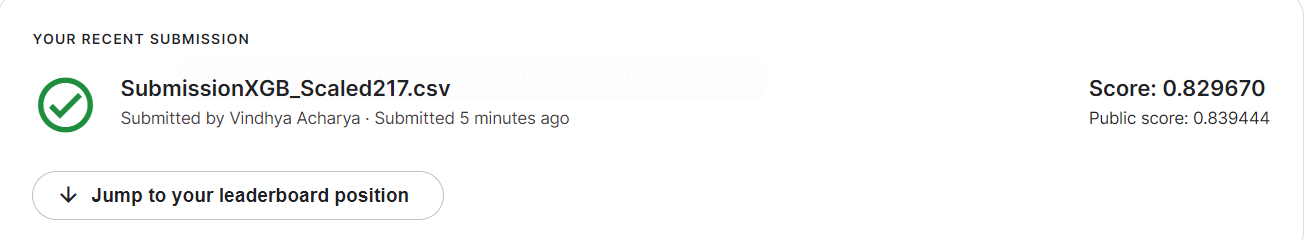

We can see that scaling is reducing the score


In [ ]:
target = y_train

In [ ]:
trainA = pd.read_pickle('/content/drive/MyDrive/FraudData/train217.pkl')
testA = pd.read_pickle('/content/drive/MyDrive/FraudData/test217.pkl')


After removing time inconsistant features

In [ ]:
from xgboost.sklearn import XGBClassifier
inconsistant = []
for i in trainA.columns:
  clf = XGBClassifier()
  #first 3 months data 
  train = np.array(trainA.loc[0:24038,i]).reshape(-1,1)

  y_train  = target[0:24038+1]

  test = np.array(trainA.loc[120195:,i]).reshape(-1,1)
  
  y_test = target[120195:]

  #print(train.shape,len(y_train))

  #print(test.shape,len(y_test))

  clf.fit(train,y_train)
 # y_pred_proba = clf.predict_proba(test)[:,1]
  #print(len(clf.predict_proba(test)[:,1]))
  
  print('AUC of feature '+i+' is ',roc_auc_score(y_test,clf.predict_proba(test)[:,1]))

  if roc_auc_score(y_test,clf.predict_proba(test)[:,1])<0.5:
    inconsistant.append(i)


AUC of feature TransactionAmt is  0.6163369868915993
AUC of feature ProductCD is  0.6256199944734517
AUC of feature card1 is  0.6314357163466474
AUC of feature card2 is  0.6589469466248516
AUC of feature card3 is  0.6491495774145423
AUC of feature card4 is  0.5040032274455063
AUC of feature card5 is  0.5803619666782311
AUC of feature card6 is  0.520881627116093
AUC of feature addr1 is  0.6301188807868081
AUC of feature addr2 is  0.6228432008098367
AUC of feature dist2 is  0.5531320022477597
AUC of feature P_emaildomain is  0.6125733139542939
AUC of feature R_emaildomain is  0.6196605684647458
AUC of feature C1 is  0.7752303862782264
AUC of feature C2 is  0.7200015933568448
AUC of feature C3 is  0.5117547105499344
AUC of feature C4 is  0.639320037007182
AUC of feature C6 is  0.6747103230116747
AUC of feature C7 is  0.6891652918147965
AUC of feature C8 is  0.6518728238399324
AUC of feature C10 is  0.6385991593532545
AUC of feature C11 is  0.6695853278608219
AUC of feature C12 is  0.69719

In [ ]:
len(inconsistant)

22

In [ ]:
trainA.drop(labels=inconsistant,axis=1,inplace=True)
testA.drop(labels=inconsistant,axis=1,inplace=True)

In [ ]:
trainA.shape,testA.shape

((144233, 195), (506691, 195))

[0]	validation_0-auc:0.831018
Will train until validation_0-auc hasn't improved in 2000 rounds.
[50]	validation_0-auc:0.918629
[99]	validation_0-auc:0.924825
AUC train: 0.9657821676021848
AUC cv : 0.924827575021655
   TransactionID   isFraud
0        3663549  0.065822
1        3663550  0.080609
2        3663551  0.076942
3        3663552  0.382690
4        3663553  0.375916


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

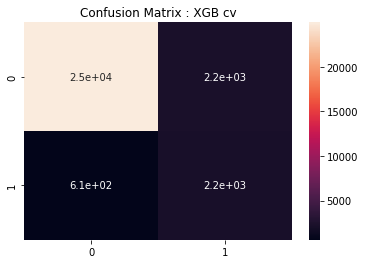

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.iloc[0:114233,:],trainA.iloc[114233:,:],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_195.csv',index = False)
files.download('SubmissionXGB_195.csv')

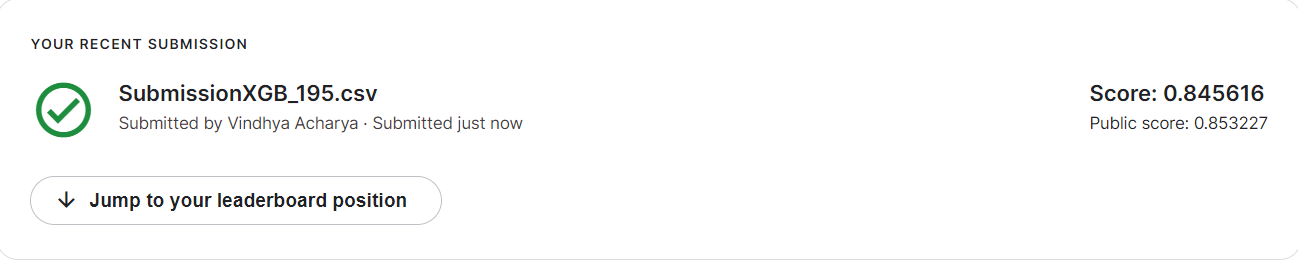

We can see that removing inconsistant features has improved the score

In [ ]:
FE28_train = pd.read_pickle('/content/drive/MyDrive/FraudData/trainA_FE28.pkl')
FE28_test = pd.read_pickle('/content/drive/MyDrive/FraudData/testA_FE28.pkl')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = FE28_train.iloc[0:114233,:],FE28_train.iloc[114233:,:],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(FE28_test[0:100000])[:,1]
test2_ = clf.predict_proba(FE28_test[100000:150000])[:,1]
test3 = clf.predict_proba(FE28_test[150000:200000])[:,1]
test4 = clf.predict_proba(FE28_test[200000:300000])[:,1]
test5 = clf.predict_proba(FE28_test[300000:400000])[:,1]
test6 = clf.predict_proba(FE28_test[400000:500000])[:,1]
test7 = clf.predict_proba(FE28_test[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_FFS.csv',index = False)
files.download('SubmissionXGB_FFS.csv')

NameError: ignored

In [ ]:
FE28_train = pd.read_pickle('/content/drive/MyDrive/FraudData/trainA_FE28.pkl').iloc[:,194:]
FE28_test = pd.read_pickle('/content/drive/MyDrive/FraudData/testA_FE28.pkl').iloc[:,194:]

In [ ]:
trainA

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,id_30,id_31,id_32,id_33,id_34,id_35,id_36,DeviceType,DeviceInfo,TransHr
0,50.000,2,4497,514.0,150.0,1.0,102.0,0.0,420.0,87.0,...,2.0,4.0,32.0,19.0,0.0,1.0,0.0,0.0,539.0,TransHr
1,15.000,2,2803,100.0,150.0,0.0,226.0,1.0,337.0,87.0,...,1.0,1.0,32.0,2.0,1.0,1.0,0.0,0.0,1.0,TransHr
2,75.887,0,16496,352.0,117.0,1.0,134.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0,TransHr
3,16.495,0,4461,375.0,185.0,1.0,224.0,1.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,NaN,TransHr
4,30.000,2,1790,555.0,150.0,0.0,226.0,1.0,170.0,87.0,...,1.0,0.0,24.0,7.0,0.0,1.0,0.0,1.0,2.0,TransHr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,48.877,0,12019,305.0,106.0,1.0,224.0,1.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,333.0,TransHr
144229,250.000,1,1214,174.0,150.0,0.0,226.0,0.0,272.0,87.0,...,2.0,0.0,32.0,25.0,0.0,1.0,0.0,0.0,667.0,TransHr
144230,73.838,0,5096,555.0,185.0,1.0,137.0,0.0,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,719.0,TransHr
144231,400.000,1,6019,583.0,150.0,0.0,226.0,0.0,337.0,87.0,...,1.0,0.0,24.0,8.0,0.0,1.0,0.0,1.0,2.0,TransHr


In [ ]:
target[90000:]

90000     0
90001     0
90002     0
90003     0
90004     0
         ..
144228    0
144229    1
144230    0
144231    0
144232    0
Name: isFraud, Length: 54233, dtype: int64

In [ ]:
trainA.columns,testA.columns

(Index(['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4',
        'card5', 'card6', 'addr1', 'addr2',
        ...
        'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
        'DeviceType', 'DeviceInfo'],
       dtype='object', length=195),
 Index(['TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4',
        'card5', 'card6', 'addr1', 'addr2',
        ...
        'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
        'DeviceType', 'DeviceInfo'],
       dtype='object', length=195))

In [ ]:
target

0         0
1         0
2         0
3         0
4         0
         ..
144228    0
144229    1
144230    0
144231    0
144232    0
Name: isFraud, Length: 144233, dtype: int64

In [ ]:
trainA

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,DeviceType,DeviceInfo
0,50.000,2,4497,514.0,150.0,1.0,102.0,0.0,420.0,87.0,...,0.0,2.0,4.0,32.0,19.0,0.0,1.0,0.0,0.0,539.0
1,15.000,2,2803,100.0,150.0,0.0,226.0,1.0,337.0,87.0,...,0.0,1.0,1.0,32.0,2.0,1.0,1.0,0.0,0.0,1.0
2,75.887,0,16496,352.0,117.0,1.0,134.0,0.0,NaN,NaN,...,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,0.0
3,16.495,0,4461,375.0,185.0,1.0,224.0,1.0,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,1.0,NaN
4,30.000,2,1790,555.0,150.0,0.0,226.0,1.0,170.0,87.0,...,1.0,1.0,0.0,24.0,7.0,0.0,1.0,0.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144228,48.877,0,12019,305.0,106.0,1.0,224.0,1.0,NaN,NaN,...,1.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,333.0
144229,250.000,1,1214,174.0,150.0,0.0,226.0,0.0,272.0,87.0,...,0.0,2.0,0.0,32.0,25.0,0.0,1.0,0.0,0.0,667.0
144230,73.838,0,5096,555.0,185.0,1.0,137.0,0.0,NaN,NaN,...,0.0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,0.0,719.0
144231,400.000,1,6019,583.0,150.0,0.0,226.0,0.0,337.0,87.0,...,1.0,1.0,0.0,24.0,8.0,0.0,1.0,0.0,1.0,2.0


####Forward Feature selection of features

In [ ]:
def adding_features():
  AUC = []
  clf = xgb.XGBClassifier()
  min = 0.5
  features = ['TransactionAmt']
  for i in trainA.columns[1:]:
    print('Feature :',i)
    clf.fit(trainA.loc[0:114233,features],target[0:114234])
    prev = roc_auc_score(target[114234:],clf.predict_proba(trainA.loc[114234:,features])[:,1])
    AUC.append(prev)
    print('AUC : ',prev)
    if prev<min:
      print('Removing Feature',i,'....')
      features.pop()
    else:
      min = prev
      print('Adding Feature',i,'....')
      features.append(i)
  return features,AUC

adding_features()

Feature : ProductCD
AUC :  0.6196700091596469
Adding Feature ProductCD ....
Feature : card1
AUC :  0.6671674868514935
Adding Feature card1 ....
Feature : card2
AUC :  0.714070569042115
Adding Feature card2 ....
Feature : card3
AUC :  0.7161006849408723
Adding Feature card3 ....
Feature : card4
AUC :  0.7330019866941175
Adding Feature card4 ....
Feature : card5
AUC :  0.7272529572936218
Removing Feature card5 ....
Feature : card6
AUC :  0.7330019866941175
Adding Feature card6 ....
Feature : addr1
AUC :  0.7341098326202529
Adding Feature addr1 ....
Feature : addr2
AUC :  0.734459791968595
Adding Feature addr2 ....
Feature : dist2
AUC :  0.7361281909136963
Adding Feature dist2 ....
Feature : P_emaildomain
AUC :  0.7344529027467315
Removing Feature P_emaildomain ....
Feature : R_emaildomain
AUC :  0.7361281909136963
Adding Feature R_emaildomain ....
Feature : C1
AUC :  0.7683249496096067
Adding Feature C1 ....
Feature : C2
AUC :  0.8619315365140438
Adding Feature C2 ....
Feature : C3
AUC :

(['TransactionAmt',
  'ProductCD',
  'card1',
  'card2',
  'card3',
  'card6',
  'addr1',
  'addr2',
  'R_emaildomain',
  'C1',
  'C2',
  'C3',
  'C10',
  'C13',
  'V22',
  'V27',
  'V41',
  'V71',
  'V72',
  'V111',
  'V114',
  'V117',
  'V120',
  'V144',
  'V146',
  'V166',
  'V169',
  'V214',
  'V224',
  'V227',
  'V230',
  'V245',
  'V250',
  'V264',
  'V277',
  'id_06',
  'id_11',
  'id_12',
  'id_13',
  'id_14',
  'id_15',
  'id_16',
  'id_19',
  'id_29',
  'id_30',
  'DeviceType',
  'DeviceInfo'],
 [0.6196700091596469,
  0.6671674868514935,
  0.714070569042115,
  0.7161006849408723,
  0.7330019866941175,
  0.7272529572936218,
  0.7330019866941175,
  0.7341098326202529,
  0.734459791968595,
  0.7361281909136963,
  0.7344529027467315,
  0.7361281909136963,
  0.7683249496096067,
  0.8619315365140438,
  0.8629179418616335,
  0.8630031123273583,
  0.8614426576471137,
  0.8630031123273583,
  0.8620523537820397,
  0.8630031123273583,
  0.8657321102589384,
  0.8624502424310612,
  0.8657

In [ ]:
features = ['TransactionAmt',
  'ProductCD',
  'card1',
  'card2',
  'card3',
  'card6',
  'addr1',
  'addr2',
  'R_emaildomain',
  'C1',
  'C2',
  'C3',
  'C10',
  'C13',
  'V22',
  'V27',
  'V41',
  'V71',
  'V72',
  'V111',
  'V114',
  'V117',
  'V120',
  'V144',
  'V146',
  'V166',
  'V169',
  'V214',
  'V224',
  'V227',
  'V230',
  'V245',
  'V250',
  'V264',
  'V277',
  'id_06',
  'id_11',
  'id_12',
  'id_13',
  'id_14',
  'id_15',
  'id_16',
  'id_19',
  'id_29',
  'id_30',
  'DeviceType',
  'DeviceInfo']

['TransactionAmt',
 'ProductCD',
 'card1',
 'card2',
 'card3',
 'card6',
 'addr1',
 'addr2',
 'R_emaildomain',
 'C1',
 'C2',
 'C3',
 'C10',
 'C13',
 'V22',
 'V27',
 'V41',
 'V71',
 'V72',
 'V111',
 'V114',
 'V117',
 'V120',
 'V144',
 'V146',
 'V166',
 'V169',
 'V214',
 'V224',
 'V227',
 'V230',
 'V245',
 'V250',
 'V264',
 'V277',
 'id_06',
 'id_11',
 'id_12',
 'id_13',
 'id_14',
 'id_15',
 'id_16',
 'id_19',
 'id_29',
 'id_30',
 'DeviceType',
 'DeviceInfo']

['TransHr', 'TransactionDollar', 'TransactionCent', 'D2n', 'D3n', 'D5n',
       'D7n', 'D8n', 'D11n', 'D12n', 'P_domain_first', 'P_domain_last', 'os',
       'screen_length'] These features seems to be increasing the score

In [ ]:
len(features)

47

[0]	validation_0-auc:0.845166
Will train until validation_0-auc hasn't improved in 2000 rounds.
[50]	validation_0-auc:0.919806
[99]	validation_0-auc:0.926733
AUC train: 0.9566976566894188
AUC cv : 0.926733411455549


TypeError: ignored

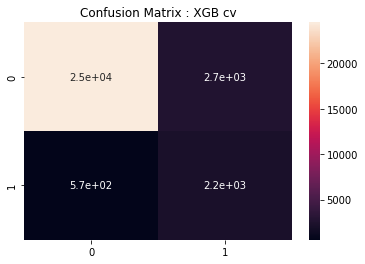

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
X_train , X_cv , y_train , y_cv = trainA.loc[0:114233,features],trainA.loc[114233:,features],target[0:114233],target[114233:]

#https://scikit-learn.org/stable/modules/preprocessing.html
#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

clf = xgb.XGBClassifier( 
        base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=0.5, colsample_bytree=0.9871152273968631, eval_metric='auc',
              gamma=5.7286862437406345, learning_rate=0.1, max_delta_step=1, max_depth=5,
              min_child_weight=4, missing=None, n_estimators=100, n_jobs=1,
              nthread=-1, objective='binary:logistic', random_state=3,
              reg_alpha=47, reg_lambda=0.9511834927999878, scale_pos_weight=10.94848913235554,
              seed=None, silent=None, subsample=1,#tree_method = 'gpu_hist',
              verbosity=1
                        )
clf.fit(X_train,y_train, 
            eval_set = [(X_cv,y_cv)],
            verbose=50, eval_metric = 'auc', early_stopping_rounds=2000)
y_cv_pred = clf.predict(X_cv)
y_cv_pred_prob = clf.predict_proba(X_cv)
cf_matrix = confusion_matrix(y_cv, y_cv_pred)
sns.heatmap(cf_matrix, annot=True)
plt.title('Confusion Matrix : XGB cv')
print('='*100)
roc_xgb_cv = roc_auc_score(y_cv, clf.predict_proba(X_cv)[:, 1])
roc_xgb_train = roc_auc_score(y_train,clf.predict_proba(X_train)[:, 1])
print('AUC train:',roc_xgb_train)
print('AUC cv :',roc_xgb_cv)

print('='*100)

test1 = clf.predict_proba(testA[0:100000])[:,1]
test2_ = clf.predict_proba(testA[100000:150000])[:,1]
test3 = clf.predict_proba(testA[150000:200000])[:,1]
test4 = clf.predict_proba(testA[200000:300000])[:,1]
test5 = clf.predict_proba(testA[300000:400000])[:,1]
test6 = clf.predict_proba(testA[400000:500000])[:,1]
test7 = clf.predict_proba(testA[500000:])[:,1]
y_test = list(test1)+list(test2_)+list(test3)+list(test4)+list(test5)+list(test6)+list(test7)
Output = pd.DataFrame(np.column_stack((Trans,y_test)),columns=['TransactionID','isFraud'])
Output['TransactionID'] = [int(i) for i in Trans]
print(Output.head())
Output.to_csv('SubmissionXGB_FFS.csv',index = False)
files.download('SubmissionXGB_FFS.csv')